# Exploratory Data Analysis

This notebook explores the dataset from CalCoFi and analyze what features to include in the analysis.

## Variables Affecting Temperature
- **Solar Radiation**: Latitude (equatorial directness → warmer), Seasonality (angle/daylight shifts).  
- **Ocean Currents**: Warm/cold currents (e.g., Gulf Stream, California Current) redistribute heat.  
- **Depth**: Surface warming vs. colder deep layers (thermocline).  
- **Atmosphere**: Wind/air heat exchange; evaporation cools surface.  

## Variables Affecting Salinity  
- **Evaporation vs. Precipitation**: Evaporation ↑ salinity (Red Sea); precipitation ↓.  
- **Freshwater Input**: Rivers (Amazon), ice melt dilute salinity.  
- **Depthm**: Temperature decreases with depth (thermocline).
- **Bottom_D**: Bottom depth influences mixing & upwelling.

## Interconnected Factors  
- **Thermohaline Circulation**: Global heat/salt redistribution via currents.  
- **Ice Processes**: Affect salinity (brine) and temperature (insulation).  
- **Evaporation**: Cools surface + ↑ salinity.  
- **Climate Change**: Ice melt, rainfall shifts disrupt balance.  

## Other Influences  
- **Mixing**: Tides/wind reduce stratification.  
- **Biological Activity**: Minimal direct impact.  
- **Time Scales**: Storms (short), monsoons (seasonal), climate shifts (long-term).  

## Data Cleaning and Exploratory Data Analysis

For this section i have inspired my analysis based on 2 notebook on kaggle: [Salinity CalCOFI Corr, Data Visual & Map](https://www.kaggle.com/code/asimislam/salinity-calcofi-corr-data-visual-map/notebook) and [TEMPERATURE-SALINITY+GEODATA](https://www.kaggle.com/code/angelosorge/temperature-salinity-geodata)

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In this notebook I have used the updated dataset (2023) which can be downloaded from the [CalCoFi](https://calcofi.org/data/oceanographic-data/bottle-database/) site. There are some differencies with the dataset on [Kaggle](https://www.kaggle.com/datasets/sohier/calcofi), the major difference is that there are way less "Reported" columns, in the updated dataset. Another difference is that in the new dataset, there's a new patch of data which populate a different location of the T-S plot. The minimum of salinity in the old dataset was 29, while in the new dataset there are many points with salinity between 24 and 27 and I found it very strange. In the analysis notebook I have used the dataset from Kaggle.

In [2]:
# Load dataset
DATA_PATH = "../data/bottle.csv"

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Dataset not found!")

# Load datasets
cast_df = pd.read_csv("../data/cast2023.csv", low_memory=False,encoding="ISO-8859-1")
bottle_df = pd.read_csv("../data/bottle2023.csv", low_memory=False,encoding="ISO-8859-1")

# Merge datasets on 'Cst_Cnt'
df = bottle_df.merge(cast_df, on='Cst_Cnt', how='inner')
print("Dataset loaded successfully!")

#3: General info
print("\nDimensions:", df.shape)
print("\nColumns:")
print(df.columns.tolist())

Dataset loaded successfully!

Dimensions: (895371, 122)

Columns:
['Cst_Cnt', 'Btl_Cnt', 'Sta_ID_x', 'Depth_ID', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum', 'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim', 'LightP', 'R_Depth', 'R_TEMP', 'R_Sal', 'R_DYNHT', 'R_Nuts', 'R_Oxy_µmol/Kg', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH1', 'pH2', 'DIC Quality Comment', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Cast_ID', 'Sta_ID_y', 'Quarter', 'Sta_Code', 'Distance', 'Date', 'Year', 'Month', 'Julian_Date', 'Julian_Day', 'Time', 'Lat_Dec', 'Lat_Deg', 'Lat_Min', 'Lat_Hem', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Lon_Hem', 'Rpt_Line', 'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Statio

**Range Index**: 895371 entries, 0 to 895370

**Data columns** (total 122 columns):

| #   | Column          |     Non-Null Count  | Dtype  |
|-----|-----------------|---------------------|--------|
| 0   | Cst_Cnt         |     895371 non-null | int64  |
| 1   | Btl_Cnt         |     895371 non-null | int64  |
| 2   | Sta_ID_bottle   |     895371 non-null | object |
| 3   | Depth_ID        |     895371 non-null | object |
| 4   | Depthm          |     895371 non-null | int64  |
| 5   | T_degC          |     884402 non-null | float64|
| 6   | Salnty          |     848015 non-null | float64|
| 7   | O2ml_L          |     725630 non-null | float64|
| 8   | STheta          |     842675 non-null | float64|
| 9   | O2Sat           |     690746 non-null | float64|
| 10  | Oxy_µmol/Kg     |     690698 non-null | float64|
| 11  | BtlNum          |     138967 non-null | float64|
| 12  | RecInd          |     895371 non-null | int64  |
| 13  | T_prec          |     884408 non-null | float64|
| 14  | T_qual          |     24016 non-null  | float64|
| 15  | S_prec          |     847984 non-null | float64|
| 16  | S_qual          |     85615 non-null  | float64|
| 17  | P_qual          |     674674 non-null | float64|
| 18  | O_qual          |     199635 non-null | float64|
| 19  | SThtaq          |     76424 non-null  | float64|
| 20  | O2Satq          |     232751 non-null | float64|
| 21  | ChlorA          |     245666 non-null | float64|
| 22  | Chlqua          |     649685 non-null | float64|
| 23  | Phaeop          |     245665 non-null | float64|
| 24  | Phaqua          |     649689 non-null | float64|
| 25  | PO4uM           |     440909 non-null | float64|
| 26  | PO4q            |     454705 non-null | float64|
| 27  | SiO3uM          |     381685 non-null | float64|
| 28  | SiO3qu          |     513857 non-null | float64|
| 29  | NO2uM           |     364442 non-null | float64|
| 30  | NO2q            |     549080 non-null | float64|
| 31  | NO3uM           |     364998 non-null | float64|
| 32  | NO3q            |     537526 non-null | float64|
| 33  | NH3uM           |     90489 non-null  | float64|
| 34  | NH3q            |     832507 non-null | float64|
| 35  | C14As1          |     15542 non-null  | float64|
| 36  | C14A1p          |     12760 non-null  | float64|
| 37  | C14A1q          |     877994 non-null | float64|
| 38  | C14As2          |     15524 non-null  | float64|
| 39  | C14A2p          |     12742 non-null  | float64|
| 40  | C14A2q          |     878012 non-null | float64|
| 41  | DarkAs          |     23759 non-null  | float64|
| 42  | DarkAp          |     20457 non-null  | float64|
| 43  | DarkAq          |     869829 non-null | float64|
| 44  | MeanAs          |     23760 non-null  | float64|
| 45  | MeanAp          |     20457 non-null  | float64|
| 46  | MeanAq          |     869828 non-null | float64|
| 47  | IncTim          |     15547 non-null  | object |
| 48  | LightP          |     19767 non-null  | float64|
| 49  | R_Depth         |     895370 non-null | float64|
| 50  | R_TEMP          |     849317 non-null | float64|
| 51  | R_Sal           |     842568 non-null | float64|
| 52  | R_DYNHT         |     848683 non-null | float64|
| 53  | R_Nuts          |     90509 non-null  | float64|
| 54  | R_Oxy_µmol/Kg   |     690698 non-null | float64|
| 55  | DIC1            |     1999 non-null   | float64|
| 56  | DIC2            |     224 non-null    | float64|
| 57  | TA1             |     2084 non-null   | float64|
| 58  | TA2             |     234 non-null    | float64|
| 59  | pH1             |     84 non-null     | float64|
| 60  | pH2             |     10 non-null     | float64|
| 61  | DIC Quality Comm|ent  55 non-null     | object |
| 62  | Cruise_ID       |     895371 non-null | object |
| 63  | Cruise          |     895371 non-null | int64  |
| 64  | Cruz_Sta        |     895371 non-null | int64  |
| 65  | DbSta_ID        |     895371 non-null | int64  |
| 66  | Cast_ID         |     895371 non-null | object |
| 67  | Sta_ID_cast     |     895371 non-null | object |
| 68  | Quarter         |     895371 non-null | int64  |
| 69  | Sta_Code        |     895371 non-null | object |
| 70  | Distance        |     540299 non-null | float64|
| 71  | Date            |     895371 non-null | object |
| 72  | Year            |     895371 non-null | int64  |
| 73  | Month           |     895371 non-null | int64  |
| 74  | Julian_Date     |     895371 non-null | int64  |
| 75  | Julian_Day      |     895371 non-null | int64  |
| 76  | Time            |     885442 non-null | object |
| 77  | Lat_Dec         |     895371 non-null | float64|
| 78  | Lat_Deg         |     895371 non-null | int64  |
| 79  | Lat_Min         |     895371 non-null | float64|
| 80  | Lat_Hem         |     895371 non-null | object |
| 81  | Lon_Dec         |     895371 non-null | float64|
| 82  | Lon_Deg         |     895371 non-null | int64  |
| 83  | Lon_Min         |     895371 non-null | float64|
| 84  | Lon_Hem         |     895371 non-null | object |
| 85  | Rpt_Line        |     895371 non-null | float64|
| 86  | St_Line         |     895371 non-null | float64|
| 87  | Ac_Line         |     895371 non-null | float64|
| 88  | Rpt_Sta         |     895371 non-null | float64|
| 89  | St_Station      |     895371 non-null | float64|
| 90  | Ac_Sta          |     895371 non-null | float64|
| 91  | Bottom_D        |     836144 non-null | float64|
| 92  | Secchi          |     145425 non-null | float64|
| 93  | ForelU          |     48941 non-null  | float64|
| 94  | Ship_Name       |     895371 non-null | object |
| 95  | Ship_Code       |     895371 non-null | object |
| 96  | Data_Type       |     895371 non-null | object |
| 97  | Order_Occ       |     296143 non-null | float64|
| 98  | Event_Num       |     895275 non-null | float64|
| 99  | Cruz_Leg        |     68016 non-null  | float64|
| 100 | Orig_Sta_ID     |     895371 non-null | object |
| 101 | Data_Or         |     474716 non-null | object |
| 102 | Cruz_Num        |     895371 non-null | object |
| 103 | IntChl          |     361197 non-null | float64|
| 104 | IntC14          |     57491 non-null  | float64|
| 105 | Inc_Str         |     57599 non-null  | object |
| 106 | Inc_End         |     57599 non-null  | object |
| 107 | PST_LAN         |     57599 non-null  | object |
| 108 | Civil_T         |     57586 non-null  | object |
| 109 | TimeZone        |     57571 non-null  | float64|
| 110 | Wave_Dir        |     319063 non-null | float64|
| 111 | Wave_Ht         |     310579 non-null | float64|
| 112 | Wave_Prd        |     301412 non-null | float64|
| 113 | Wind_Dir        |     868389 non-null | float64|
| 114 | Wind_Spd        |     867207 non-null | float64|
| 115 | Barometer       |     498299 non-null | float64|
| 116 | Dry_T           |     498662 non-null | float64|
| 117 | Wet_T           |     497296 non-null | float64|
| 118 | Wea             |     699490 non-null | float64|
| 119 | Cloud_Typ       |     265103 non-null | float64|
| 120 | Cloud_Amt       |     308596 non-null | float64|
| 121 | Visibility      |     251624 non-null | float64|

**dtypes:**: float64(86), int64(14), object(22)

**memory usage**: 833.4+ MB

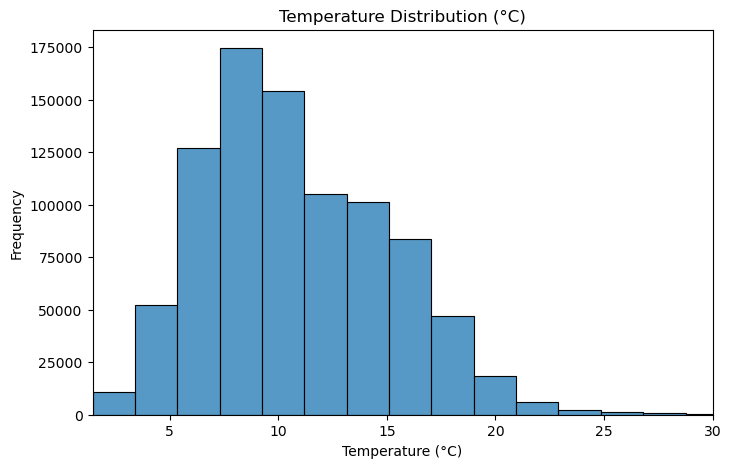

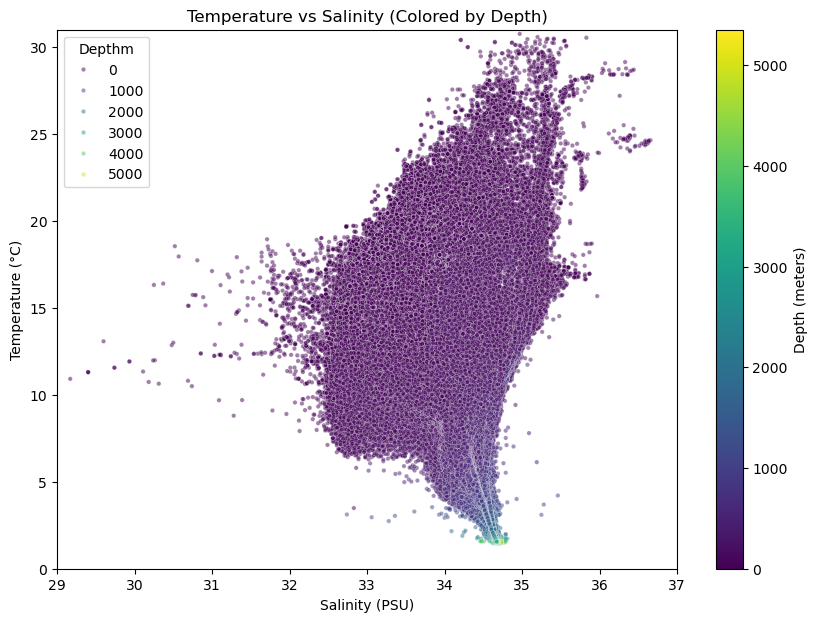

In [3]:
# it takes ~20 seconds to run

# Temperature distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['T_degC'].dropna(), bins=50)
plt.title("Temperature Distribution (°C)")
plt.xlabel("Temperature (°C)")
plt.xlim(df['T_degC'].min(), 30) # because of ouliers
plt.ylabel("Frequency")
plt.show()

# Scatterplot of Temperature vs Salinity
plt.figure(figsize=(10, 7))
ax = sns.scatterplot(
    data=df,
    x='Salnty',
    y='T_degC',
    hue='Depthm',  # Color by depth
    palette='viridis',  # Use a perceptually uniform colormap
    alpha=0.5,  # Add transparency for readability
    s=10  # Adjust marker size
)
plt.title("Temperature vs Salinity (Colored by Depth)")
plt.ylabel("Temperature (°C)")
plt.xlabel("Salinity (PSU)")
plt.xlim(29, 37) # because of ouliers
plt.ylim(0, 31) # because of ouliers

# Add colorbar
norm = plt.Normalize(df['Depthm'].min(), df['Depthm'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Depth (meters)', ax=ax)

plt.show()

Here i have limited the x and y axis because of some outliers

In [4]:
df.select_dtypes(include=['object']).columns # physically irrelevant columns

Index(['Sta_ID_x', 'Depth_ID', 'IncTim', 'DIC Quality Comment', 'Cruise_ID',
       'Cast_ID', 'Sta_ID_y', 'Sta_Code', 'Date', 'Time', 'Lat_Hem', 'Lon_Hem',
       'Ship_Name', 'Ship_Code', 'Data_Type', 'Orig_Sta_ID', 'Data_Or',
       'Cruz_Num', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T'],
      dtype='object')

In [5]:
# Let's drop all the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df = df.drop(columns=categorical_cols)

# Check which categorical columns were actually found and removed
print(f"Removed {len(categorical_cols)} categorical columns.")
print("Dropped categorical columns: ", list(categorical_cols))

Removed 22 categorical columns.
Dropped categorical columns:  ['Sta_ID_x', 'Depth_ID', 'IncTim', 'DIC Quality Comment', 'Cruise_ID', 'Cast_ID', 'Sta_ID_y', 'Sta_Code', 'Date', 'Time', 'Lat_Hem', 'Lon_Hem', 'Ship_Name', 'Ship_Code', 'Data_Type', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T']


In [6]:
df_null = (# Count missing values in each column, sort by total missing values, and calculate percentage of missing values 
    df.isnull().sum()
    .to_frame(name='Total')
    .assign(Percent=lambda x: round(x['Total']/len(df)*100, 2))
    .sort_values('Total', ascending=False)
    .rename_axis('Attr')
    .reset_index() # Reset index for better visualization in the next step
)

print(df_null.head())

   Attr   Total  Percent
0   pH2  895361   100.00
1   pH1  895287    99.99
2  DIC2  895147    99.97
3   TA2  895137    99.97
4  DIC1  893372    99.78


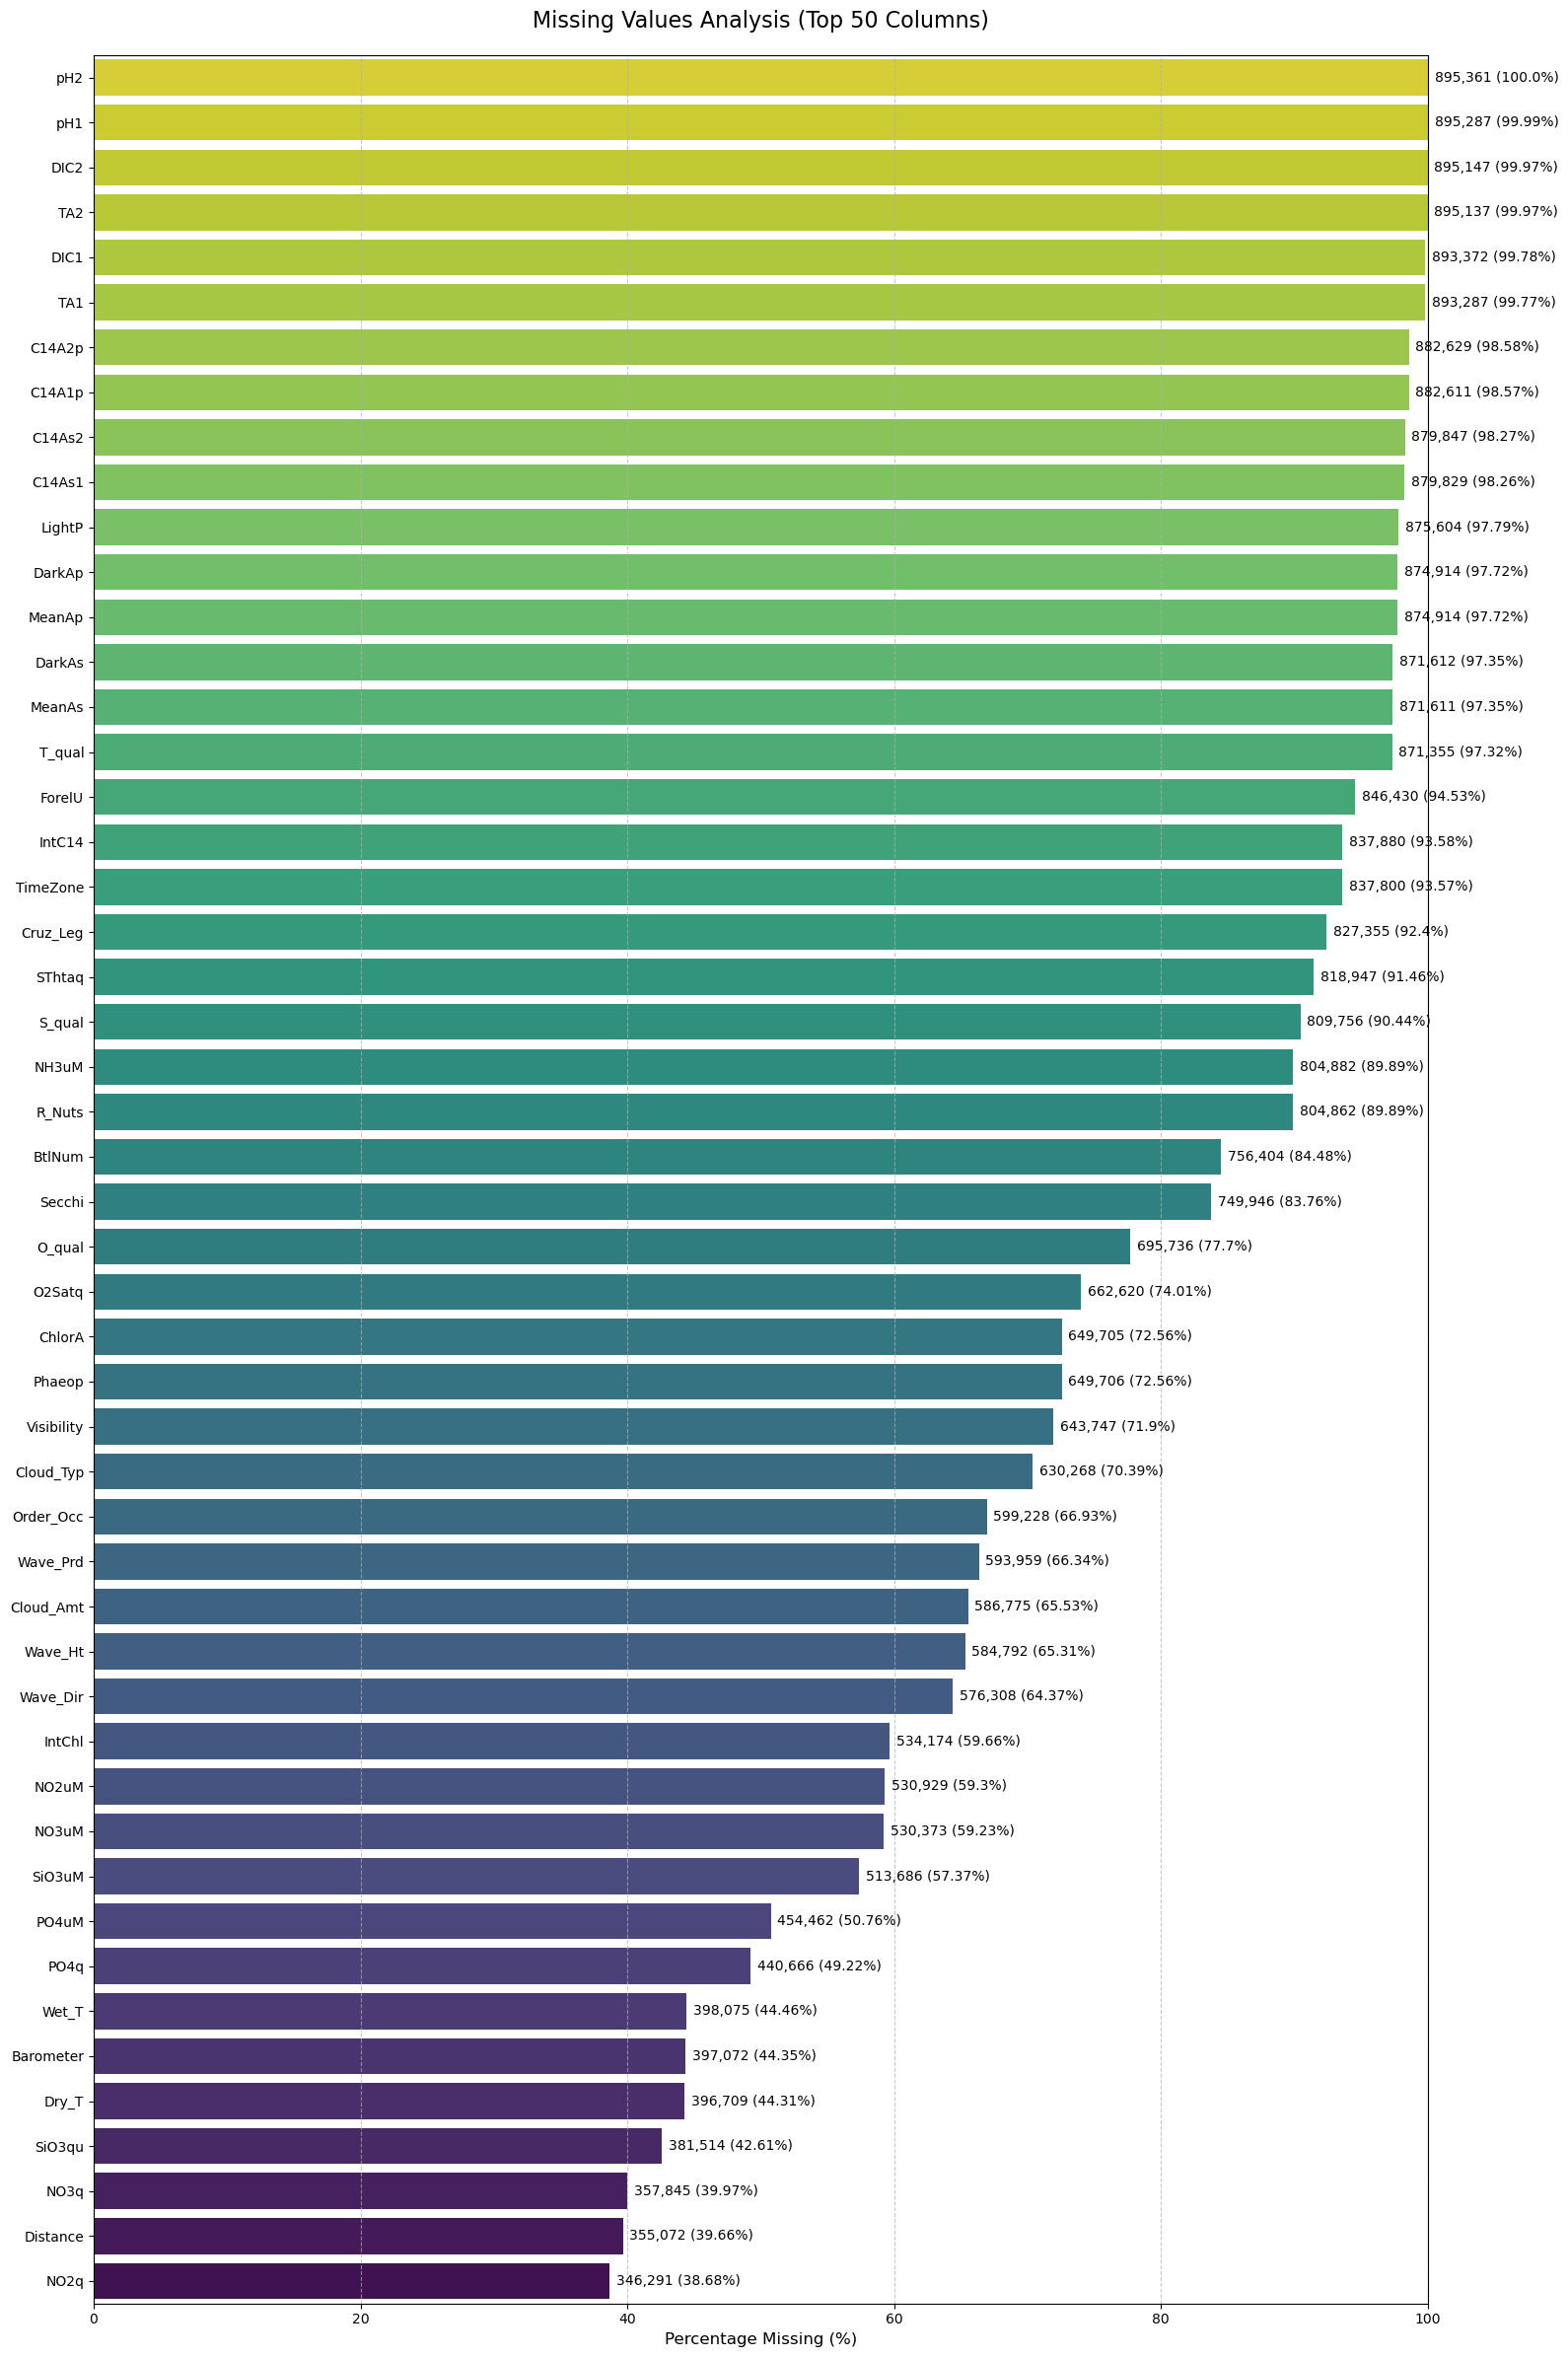

In [7]:
def plot_missing_values(df_null, top_n=30, figsize=(16, 24)):
    # Filter and sort
    plot_df = df_null[df_null['Total'] > 0].sort_values('Percent', ascending=False)
    
    # Take top N columns with highest percentage missing
    plot_df = plot_df.head(top_n)
    
    plt.figure(figsize=figsize)
    ax = sns.barplot(
        x='Percent', 
        y='Attr', 
        data=plot_df, 
        hue='Attr',  # Add this
        palette='viridis_r', 
        orient='h',
        legend=False  # Add this to suppress legend
    )
    
    # Annotate with both values
    for i, (total, pct) in enumerate(zip(plot_df['Total'], plot_df['Percent'])):
        ax.text(pct + 0.5, i, 
                f"{total:,} ({pct}%)", 
                va='center', ha='left', fontsize=10)
    
    # Formatting
    plt.title(f'Missing Values Analysis (Top {top_n} Columns)', pad=20, fontsize=16)
    plt.xlabel('Percentage Missing (%)', fontsize=12)
    plt.ylabel('')
    plt.xlim(0, 100)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
# Usage
plot_missing_values(df_null, top_n=50)

In [8]:
# Drop columns with >30% nulls
cols_to_drop = df_null.loc[df_null['Percent'] > 30, 'Attr'] # locate 
df = df.drop(columns=cols_to_drop)

if not cols_to_drop.empty:
    print(f"Removed {len(cols_to_drop)} columns. New shape: {df.shape}")
    print("Dropped columns:", list(cols_to_drop))

Removed 50 columns. New shape: (895371, 50)
Dropped columns: ['pH2', 'pH1', 'DIC2', 'TA2', 'DIC1', 'TA1', 'C14A2p', 'C14A1p', 'C14As2', 'C14As1', 'LightP', 'DarkAp', 'MeanAp', 'DarkAs', 'MeanAs', 'T_qual', 'ForelU', 'IntC14', 'TimeZone', 'Cruz_Leg', 'SThtaq', 'S_qual', 'NH3uM', 'R_Nuts', 'BtlNum', 'Secchi', 'O_qual', 'O2Satq', 'Phaeop', 'ChlorA', 'Visibility', 'Cloud_Typ', 'Order_Occ', 'Wave_Prd', 'Cloud_Amt', 'Wave_Ht', 'Wave_Dir', 'IntChl', 'NO2uM', 'NO3uM', 'SiO3uM', 'PO4uM', 'PO4q', 'Wet_T', 'Barometer', 'Dry_T', 'SiO3qu', 'NO3q', 'Distance', 'NO2q']



Missing values after dropping columns:
            Attr   Total  Percent
0         Chlqua  245686    27.44
1         Phaqua  245682    27.44
2         P_qual  220697    24.65
3  R_Oxy_µmol/Kg  204673    22.86
4    Oxy_µmol/Kg  204673    22.86


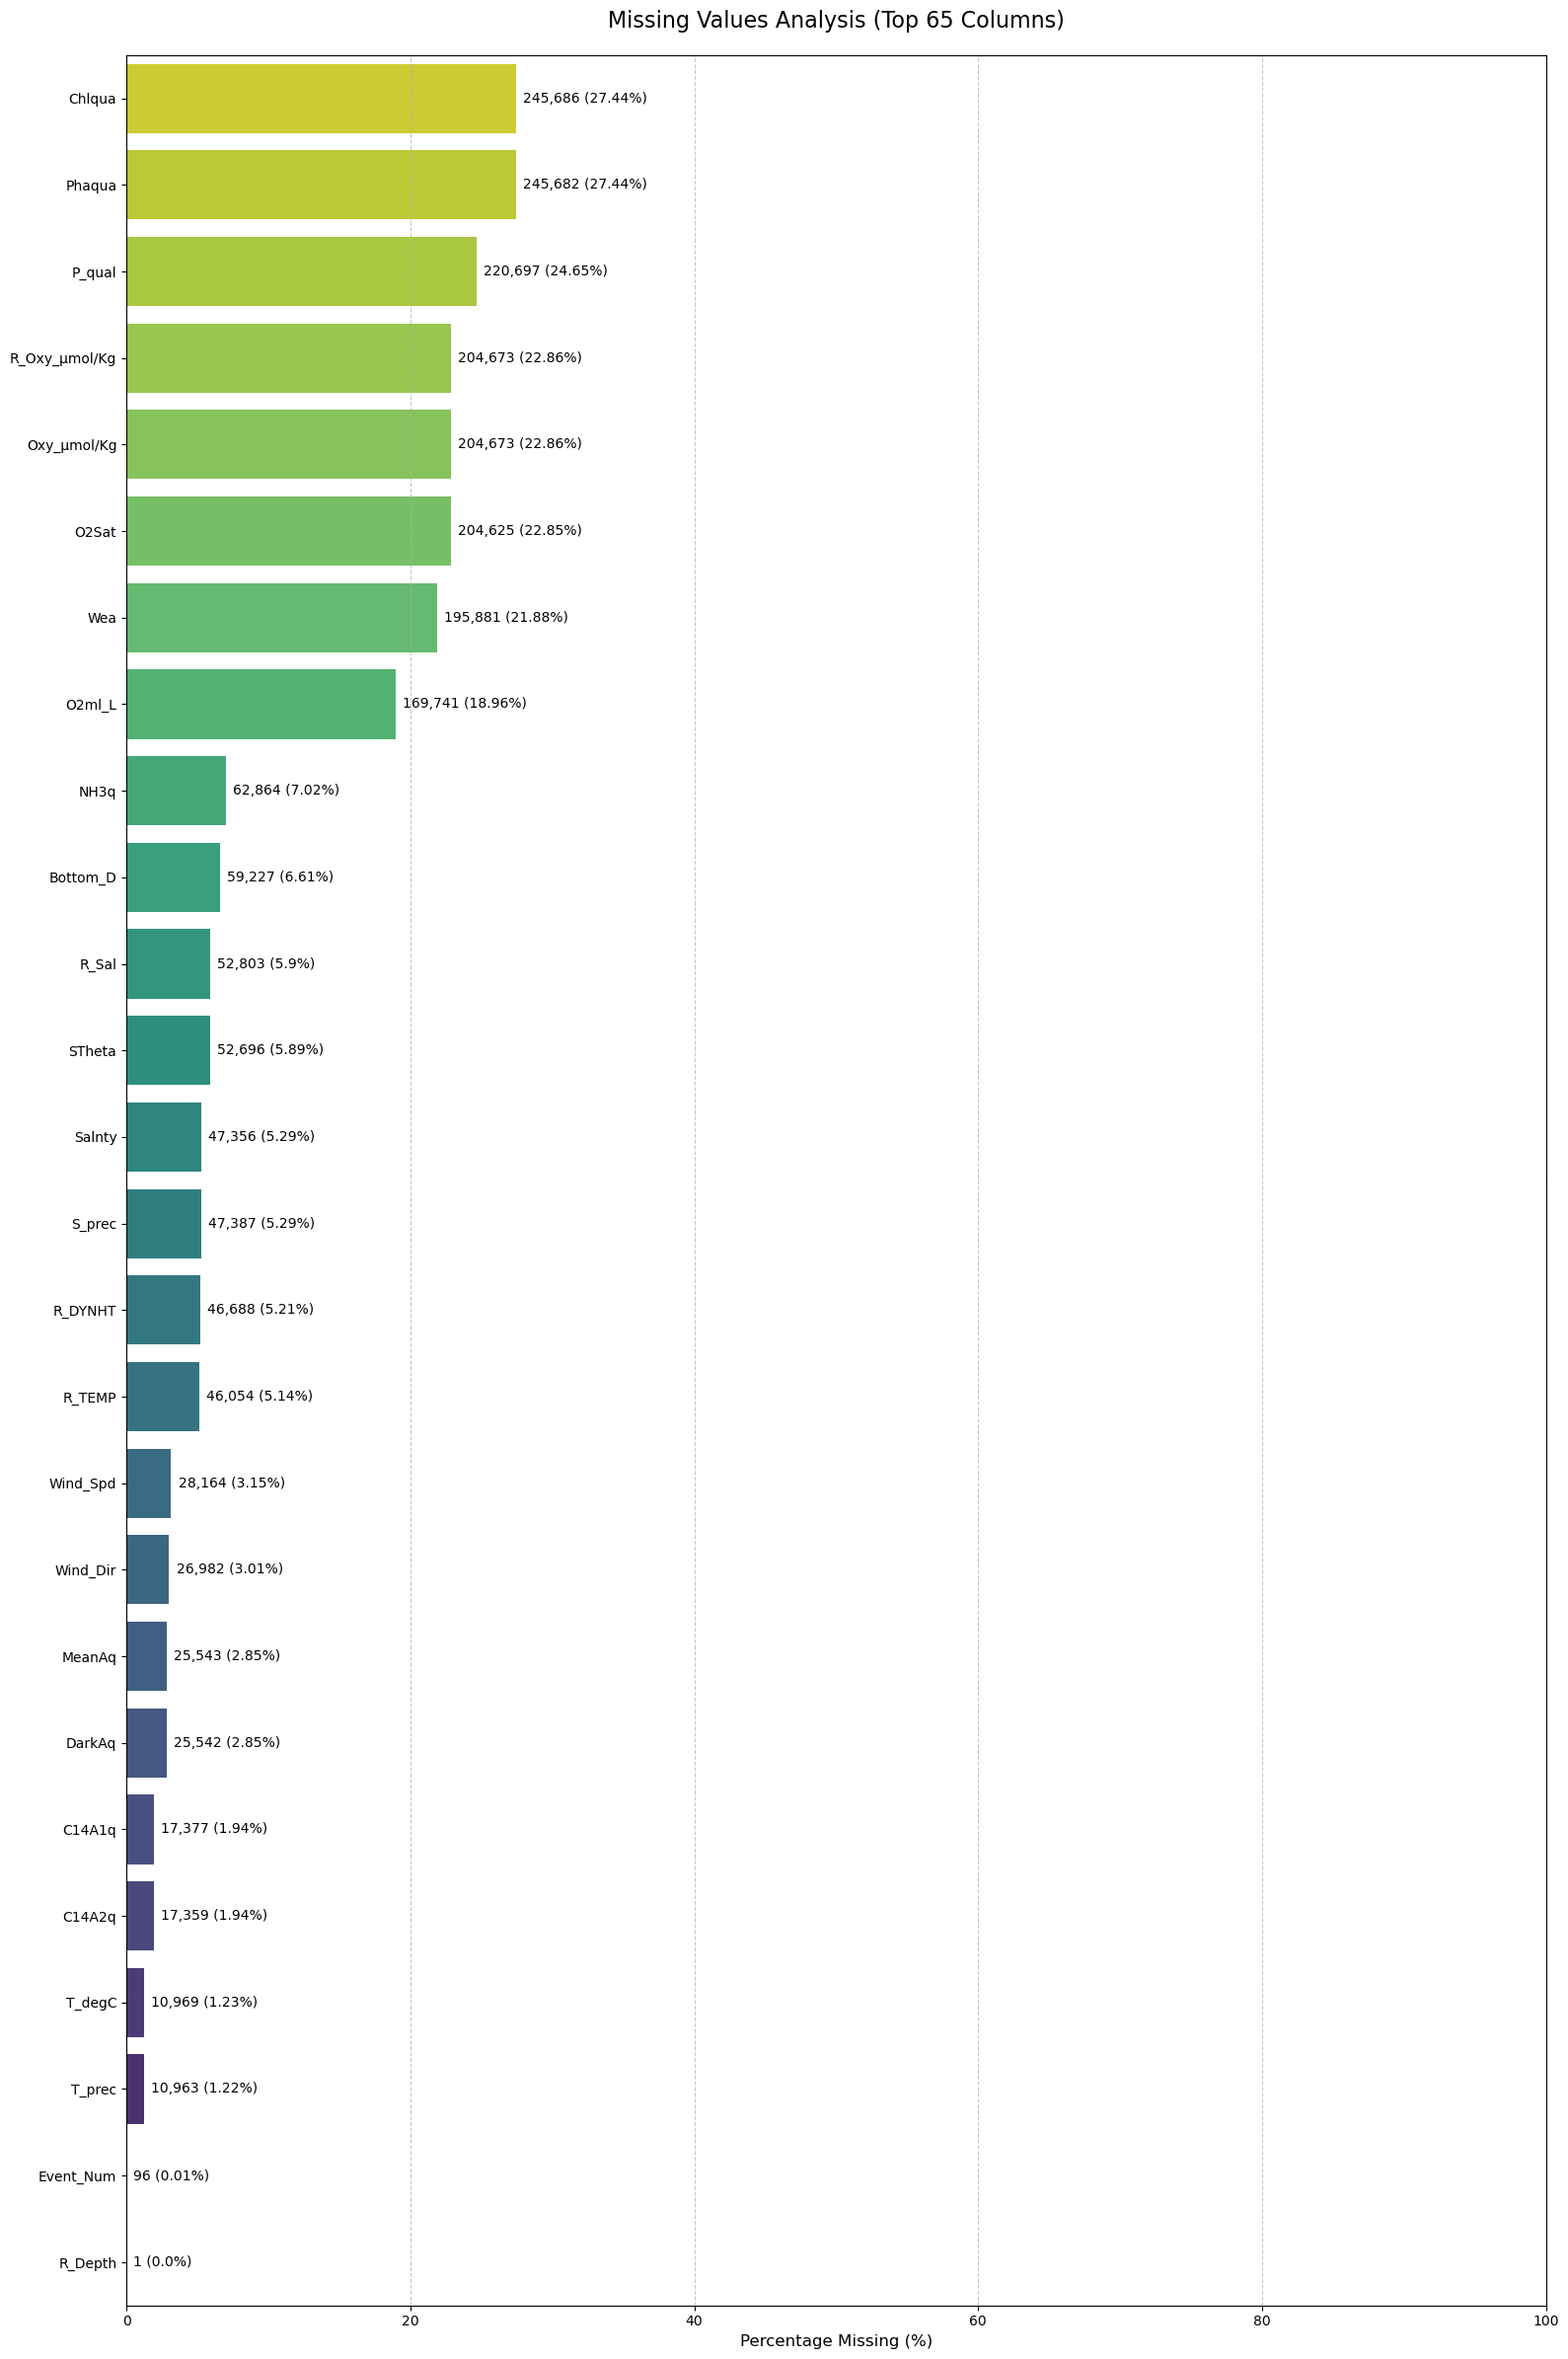

In [9]:
df_null = (
    df.isnull().sum()
    .to_frame(name='Total')
    .assign(Percent=lambda x: round(x['Total']/len(df)*100, 2))
    .sort_values('Total', ascending=False)
    .rename_axis('Attr')
    .reset_index() # Reset index for better visualization in the next step
)
print("\nMissing values after dropping columns:")
print(df_null.head())

plot_missing_values(df_null, top_n=65)

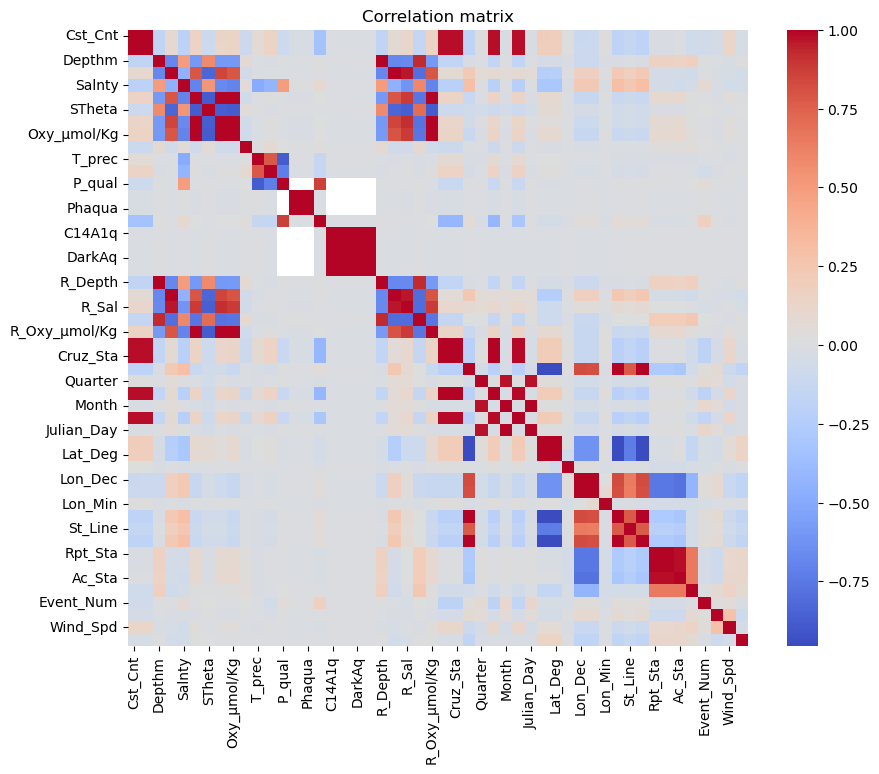

In [10]:
#Correlation matrix of the remaining columns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=False, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

In [11]:
df["RecInd"].value_counts() # RecInd = record indicator, quality code for the data
# “3” Observed Data
# “4” Educated office guess (ghost)
# “5” Data from STD or CTD sensor
# “6” Duplicate Depth
# “7” Interpolated to a standard depth"

RecInd
3    474987
7    335003
5     81177
6      4202
4         2
Name: count, dtype: int64

In [12]:
# support function to plot histogram with descriptive statistics
def plot_histogram_with_stats(df, column_name, bins=100, range=None):
    """
    This function generates a histogram for a given column in a dataframe and annotates it with descriptive statistics.
    
    Parameters:
    - df: DataFrame containing the data.
    - column_name: Column name to plot.
    - bins: Number of bins for the histogram (default is 100).
    - range: Range of the histogram (default is None, meaning automatic).
    """
    # Get the descriptive statistics
    description = df[column_name].describe()
    
    # Plot the histogram
    plt.figure(figsize=(8, 6))
    plt.hist(df[column_name], bins=bins, range=range, color='skyblue', edgecolor='black')

    # Adding labels and title
    plt.xlabel(f"{column_name} (units)")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column_name}")
    
    # Annotating the plot with descriptive statistics
    stats_text = (
        f"Count: {description['count']:.0f}\n"
        f"Mean: {description['mean']:.2f}\n"
        f"Std Dev: {description['std']:.2f}\n"
        f"Min: {description['min']:.2f}\n"
        f"25th Percentile: {description['25%']:.2f}\n"
        f"Median: {description['50%']:.2f}\n"
        f"75th Percentile: {description['75%']:.2f}\n"
        f"Max: {description['max']:.2f}"
    )

    # Adding the text to the plot
    plt.text(0.95, 0.95, stats_text, ha='right', va='top', fontsize=10,
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    # Show plot
    plt.tight_layout()
    plt.show()

At what depth are the measurement taken? can i neglet the wind speed data? is the maximum depth (Bottom_D) relevant?

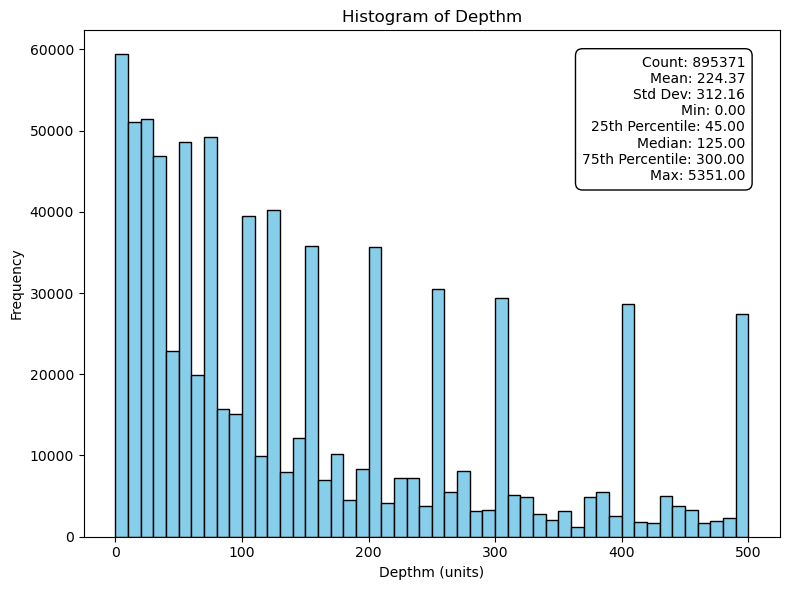

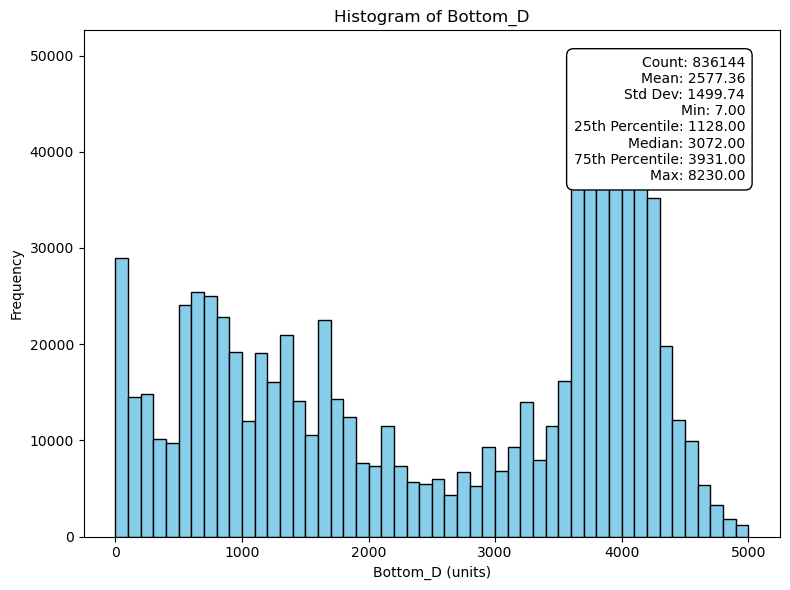

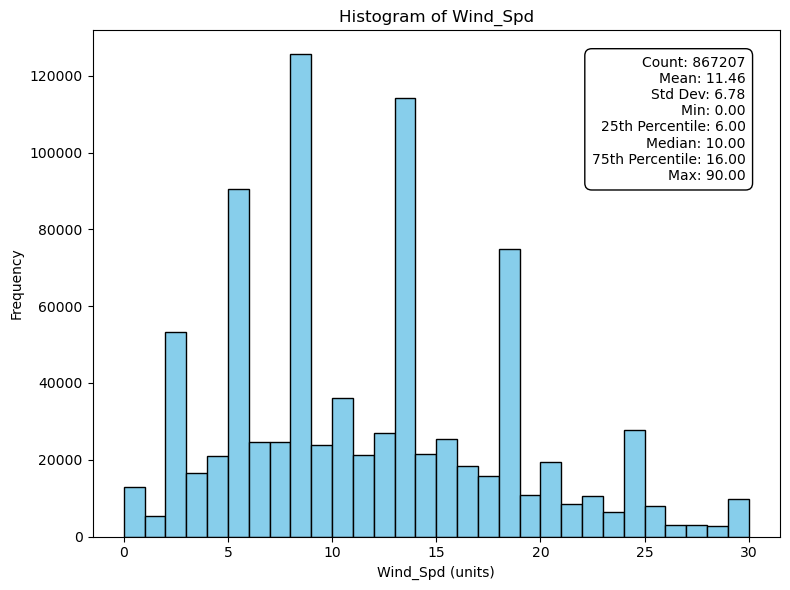

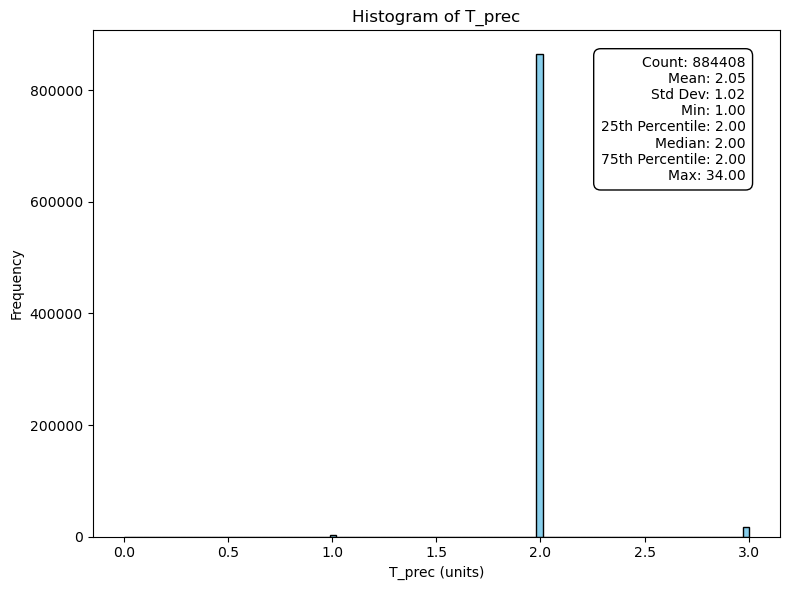

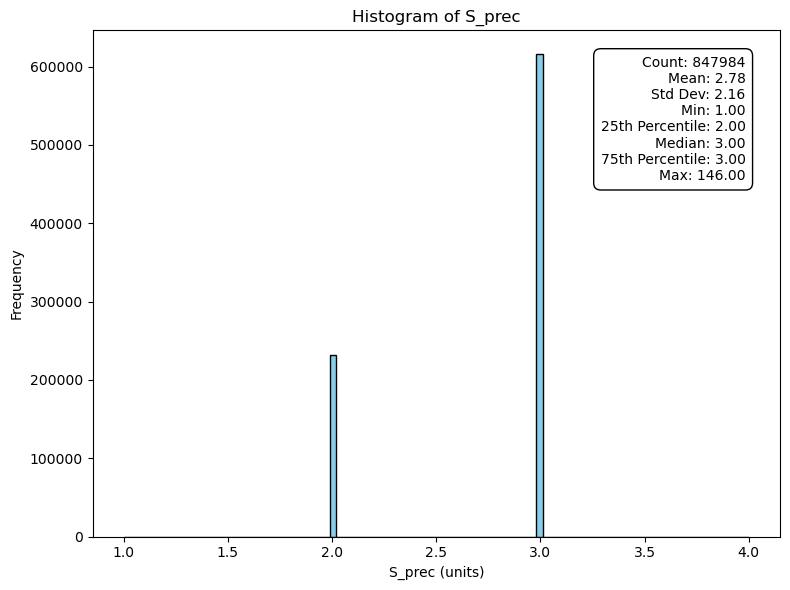

In [19]:
# Plot histograms for Bottom_D and Wind_spd with a custom range and bins
plot_histogram_with_stats(df,"Depthm", bins=50, range=(0, 500))
plot_histogram_with_stats(df, "Bottom_D", bins=50, range=(0, 5000))
plot_histogram_with_stats(df, "Wind_Spd", bins=30, range=(0, 30))
plot_histogram_with_stats(df, "T_prec", bins=100, range=(0, 3))
plot_histogram_with_stats(df, "S_prec", bins=100, range=(1, 4))

Most measurements were taken in shallow waters (the mean is 200 meters), the wind speed (the mean is 11 and is classified as "gentle breeze") may indirectly affect temperature and salinity so we have to keep it.

Let's now compare the reported values vs measurements, if they are very similar we can safely drop them because they are redundant

In [45]:
df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta',
       'O2Sat', 'Oxy_µmol/Kg', 'RecInd', 'T_prec', 'S_prec', 'P_qual',
       'Chlqua', 'Phaqua', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq',
       'R_Depth', 'R_TEMP', 'R_Sal', 'R_DYNHT', 'R_Oxy_µmol/Kg', 'Cruise',
       'Cruz_Sta', 'DbSta_ID', 'Quarter', 'Year', 'Month', 'Julian_Date',
       'Julian_Day', 'Lat_Dec', 'Lat_Deg', 'Lat_Min', 'Lon_Dec', 'Lon_Deg',
       'Lon_Min', 'Rpt_Line', 'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station',
       'Ac_Sta', 'Bottom_D', 'Event_Num', 'Wind_Dir', 'Wind_Spd', 'Wea'],
      dtype='object')

In [46]:
# Define pairs to compare
comparison_pairs = [
    ('Depthm', 'R_Depth'),
    ('T_degC', 'R_TEMP'),
    ('Salnty', 'R_Sal'),
    ('Oxy_µmol/Kg', 'R_Oxy_µmol/Kg')
]
# Statistical comparison table
stats_list = []
for orig_col, r_col in comparison_pairs:
    if orig_col in df.columns and r_col in df.columns:
        valid_data = df[[orig_col, r_col]].dropna()
        stats = {
            'Pair': f"{orig_col} vs {r_col}",
            'N': len(valid_data),
            'Correlation': valid_data.corr().iloc[0,1],
            'Mean_Difference': (valid_data[r_col] - valid_data[orig_col]).mean(),
            'Std_Difference': (valid_data[r_col] - valid_data[orig_col]).std(),
            'Max_Abs_Diff': (valid_data[r_col] - valid_data[orig_col]).abs().max()
        }
        stats_list.append(stats)

stats_df = pd.DataFrame(stats_list)
print("\nStatistical Comparison Summary:")
print(stats_df.to_string(index=False))


Statistical Comparison Summary:
                        Pair      N  Correlation  Mean_Difference  Std_Difference  Max_Abs_Diff
           Depthm vs R_Depth 895370     0.999994         1.552127        3.529186      107.0000
            T_degC vs R_TEMP 849314     0.999955        -0.020889        0.043230       16.6420
             Salnty vs R_Sal 842568    -0.611153       187.607947       93.864797     5043.9991
Oxy_µmol/Kg vs R_Oxy_µmol/Kg 690698     0.999998         0.000789        0.158473      130.5639


Expect for Salinity (i don't know why), they all have perfect agreement and small difference. We can neglet them safely.

In [47]:
# Drop columns with quality codes
quality_cols = [
    'T_qual', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq', 'Chlqua',
    'Phaqua', 'PO4q', 'SiO3qu', 'NO2q', 'NO3q', 'NH3q', 'C14A1q', 'C14A2q',
    'DarkAq', 'MeanAq', 'DIC Quality Comment'
]

repeat_cols = [ 'R_Depth', 'R_TEMP', 'R_DYNHT']

non_physical = [
    # Identifiers/Counts
    'Cst_Cnt', 'Btl_Cnt', 'DbSta_ID', 'Event_Num', 
    'Cruise', 'Cruz_Sta', 'Rpt_Line', 'St_Line', 'Ac_Line',
    'Rpt_Sta', 'St_Station', 'Ac_Sta',
    
    # Redundant location formats
    'Lat_Deg', 'Lat_Min', 'Lon_Deg', 'Lon_Min',
    
    # Temporal descriptors
    'Julian_Day', 'Year', 'Month', 'Julian_Date',
    
    # Precision metrics
    'T_prec', 'S_prec',
    
    # Reported duplicates
    'R_Depth', 'R_TEMP', 'R_Sal', 'R_DYNHT', 'R_Oxy_µmol/Kg',
    
    # redundant oxygen concentration measurements
    'Oxy_µmol/Kg','O2Sat',
    # Non-core measurements
    'Wind_Dir', 'Wea'
]

# Find columns that actually exist in the DataFrame
columns_to_drop = quality_cols + non_physical + repeat_cols
existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]

# Safely drop only existing columns
df = df.drop(columns=existing_cols_to_drop)

# Show actual changes
print(f"Successfully removed {len(existing_cols_to_drop)} columns.")
print("Columns dropped:", existing_cols_to_drop)
print(f"{len(columns_to_drop) - len(existing_cols_to_drop)} columns were already missing")

Successfully removed 42 columns.
Columns dropped: ['P_qual', 'Chlqua', 'Phaqua', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq', 'Cst_Cnt', 'Btl_Cnt', 'DbSta_ID', 'Event_Num', 'Cruise', 'Cruz_Sta', 'Rpt_Line', 'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Lat_Deg', 'Lat_Min', 'Lon_Deg', 'Lon_Min', 'Julian_Day', 'Year', 'Month', 'Julian_Date', 'T_prec', 'S_prec', 'R_Depth', 'R_TEMP', 'R_Sal', 'R_DYNHT', 'R_Oxy_µmol/Kg', 'Oxy_µmol/Kg', 'O2Sat', 'Wind_Dir', 'Wea', 'R_Depth', 'R_TEMP', 'R_DYNHT']
10 columns were already missing


In [48]:
df.columns.tolist() # Check remaining columns

['Depthm',
 'T_degC',
 'Salnty',
 'O2ml_L',
 'STheta',
 'RecInd',
 'Quarter',
 'Lat_Dec',
 'Lon_Dec',
 'Bottom_D',
 'Wind_Spd']

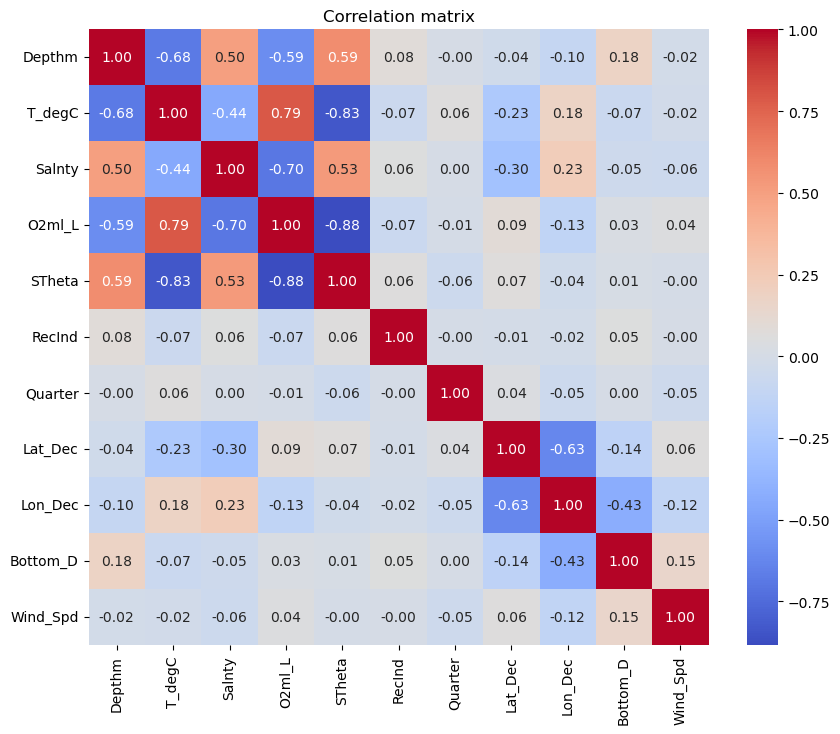

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

## 1. Strong Physical Relationships

| Correlation | Interpretation |
|-------------|---------------|
| T_degC ↔ Depthm (-0.68) | Strong inverse relationship: Temperature decreases with depth (expected thermocline pattern) |
| T_degC ↔ STheta (-0.83) | Strong inverse relationship: Temperature drives density variations (warmer water = less dense) |

## 2. Salinity Dynamics

| Correlation | Insight |
|-------------|---------|
| Salnty ↔ Depthm (0.50) | Salinity increases with depth (halocline present) |
| Salnty ↔ T_degC (-0.44) | Cooler waters tend to be saltier (characteristic of deep water masses) |
| Salnty ↔ O2ml_L (-0.70) | Saltier waters have lower oxygen (common in deep/bottom waters) |

## 3. Oxygen System Drivers

| Correlation | Meaning |
|-------------|---------|
| O2ml_L ↔ T_degC (0.79) | Warmer waters hold less dissolved oxygen (matches gas solubility physics) |
| O2ml_L ↔ STheta (-0.88) | Denser waters (cooler/saltier) have lower oxygen |

## 4. Geographic Patterns

| Correlation | Significance |
|-------------|--------------|
| Lat_Dec ↔ Lon_Dec (-0.63) | Sampling locations follow diagonal transect (CalCOFI line) |
| Lat_Dec ↔ Salnty (-0.30) | Lower latitudes (south) have higher salinity (California Current system) |
| Lon_Dec ↔ Bottom_D (-0.43) | Western stations (higher longitudes) have deeper bottom depths |

## 5. Surprising Absences

| Observation | Implication |
|-------------|-------------|
| Quarter ↔ All (~0) | No strong seasonal signal in parameters (unexpected for surface waters) |
| Wind_Spd ↔ All (~0) | Wind speed shows minimal direct correlation with measured water properties |


In [50]:
df_null = (# Count missing values in each column, sort by total missing values, and calculate percentage of missing values 
    df.isnull().sum()
    .to_frame(name='Total')
    .assign(Percent=lambda x: round(x['Total']/len(df)*100, 2))
    .sort_values('Total', ascending=False)
    .rename_axis('Attr')
    .reset_index() # Reset index for better visualization in the next step
)

print(df_null.head())

       Attr   Total  Percent
0    O2ml_L  169741    18.96
1  Bottom_D   59227     6.61
2    STheta   52696     5.89
3    Salnty   47356     5.29
4  Wind_Spd   28164     3.15


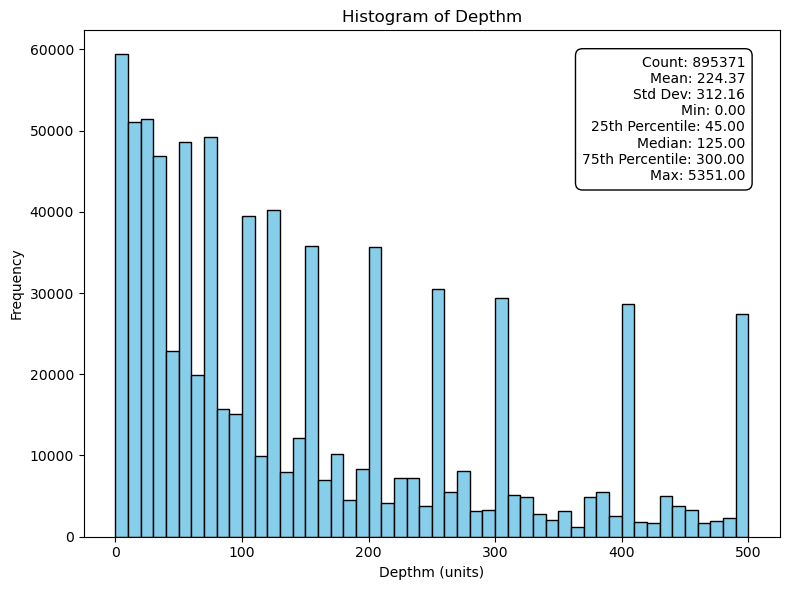

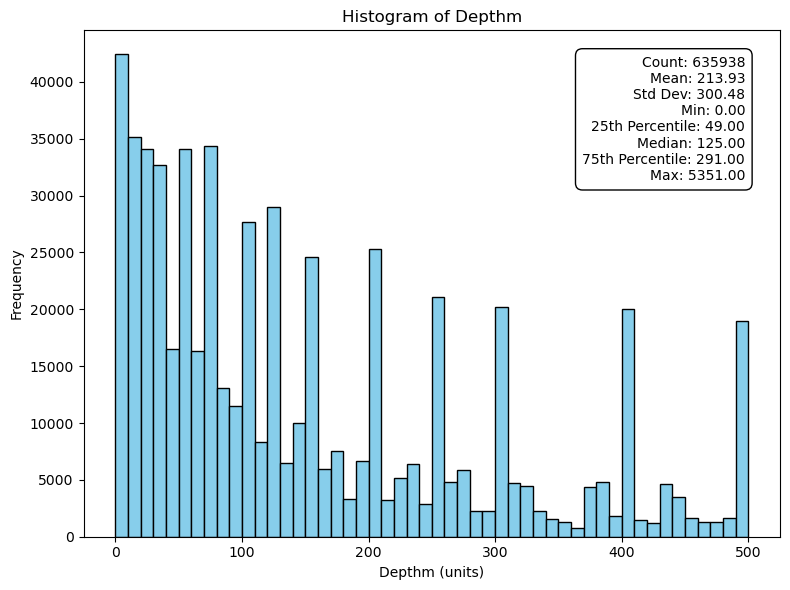

In [51]:
df_clean = df.dropna()

plot_histogram_with_stats(df,"Depthm", bins=50, range=(0, 500))
# Check Depthm after dropping nulls
plot_histogram_with_stats(df_clean, "Depthm", bins=50, range=(0, 500))

The eliminated data were mostly in shallow waters, Let's try filling the rest of the missing data with the median and see how the distribution changes.

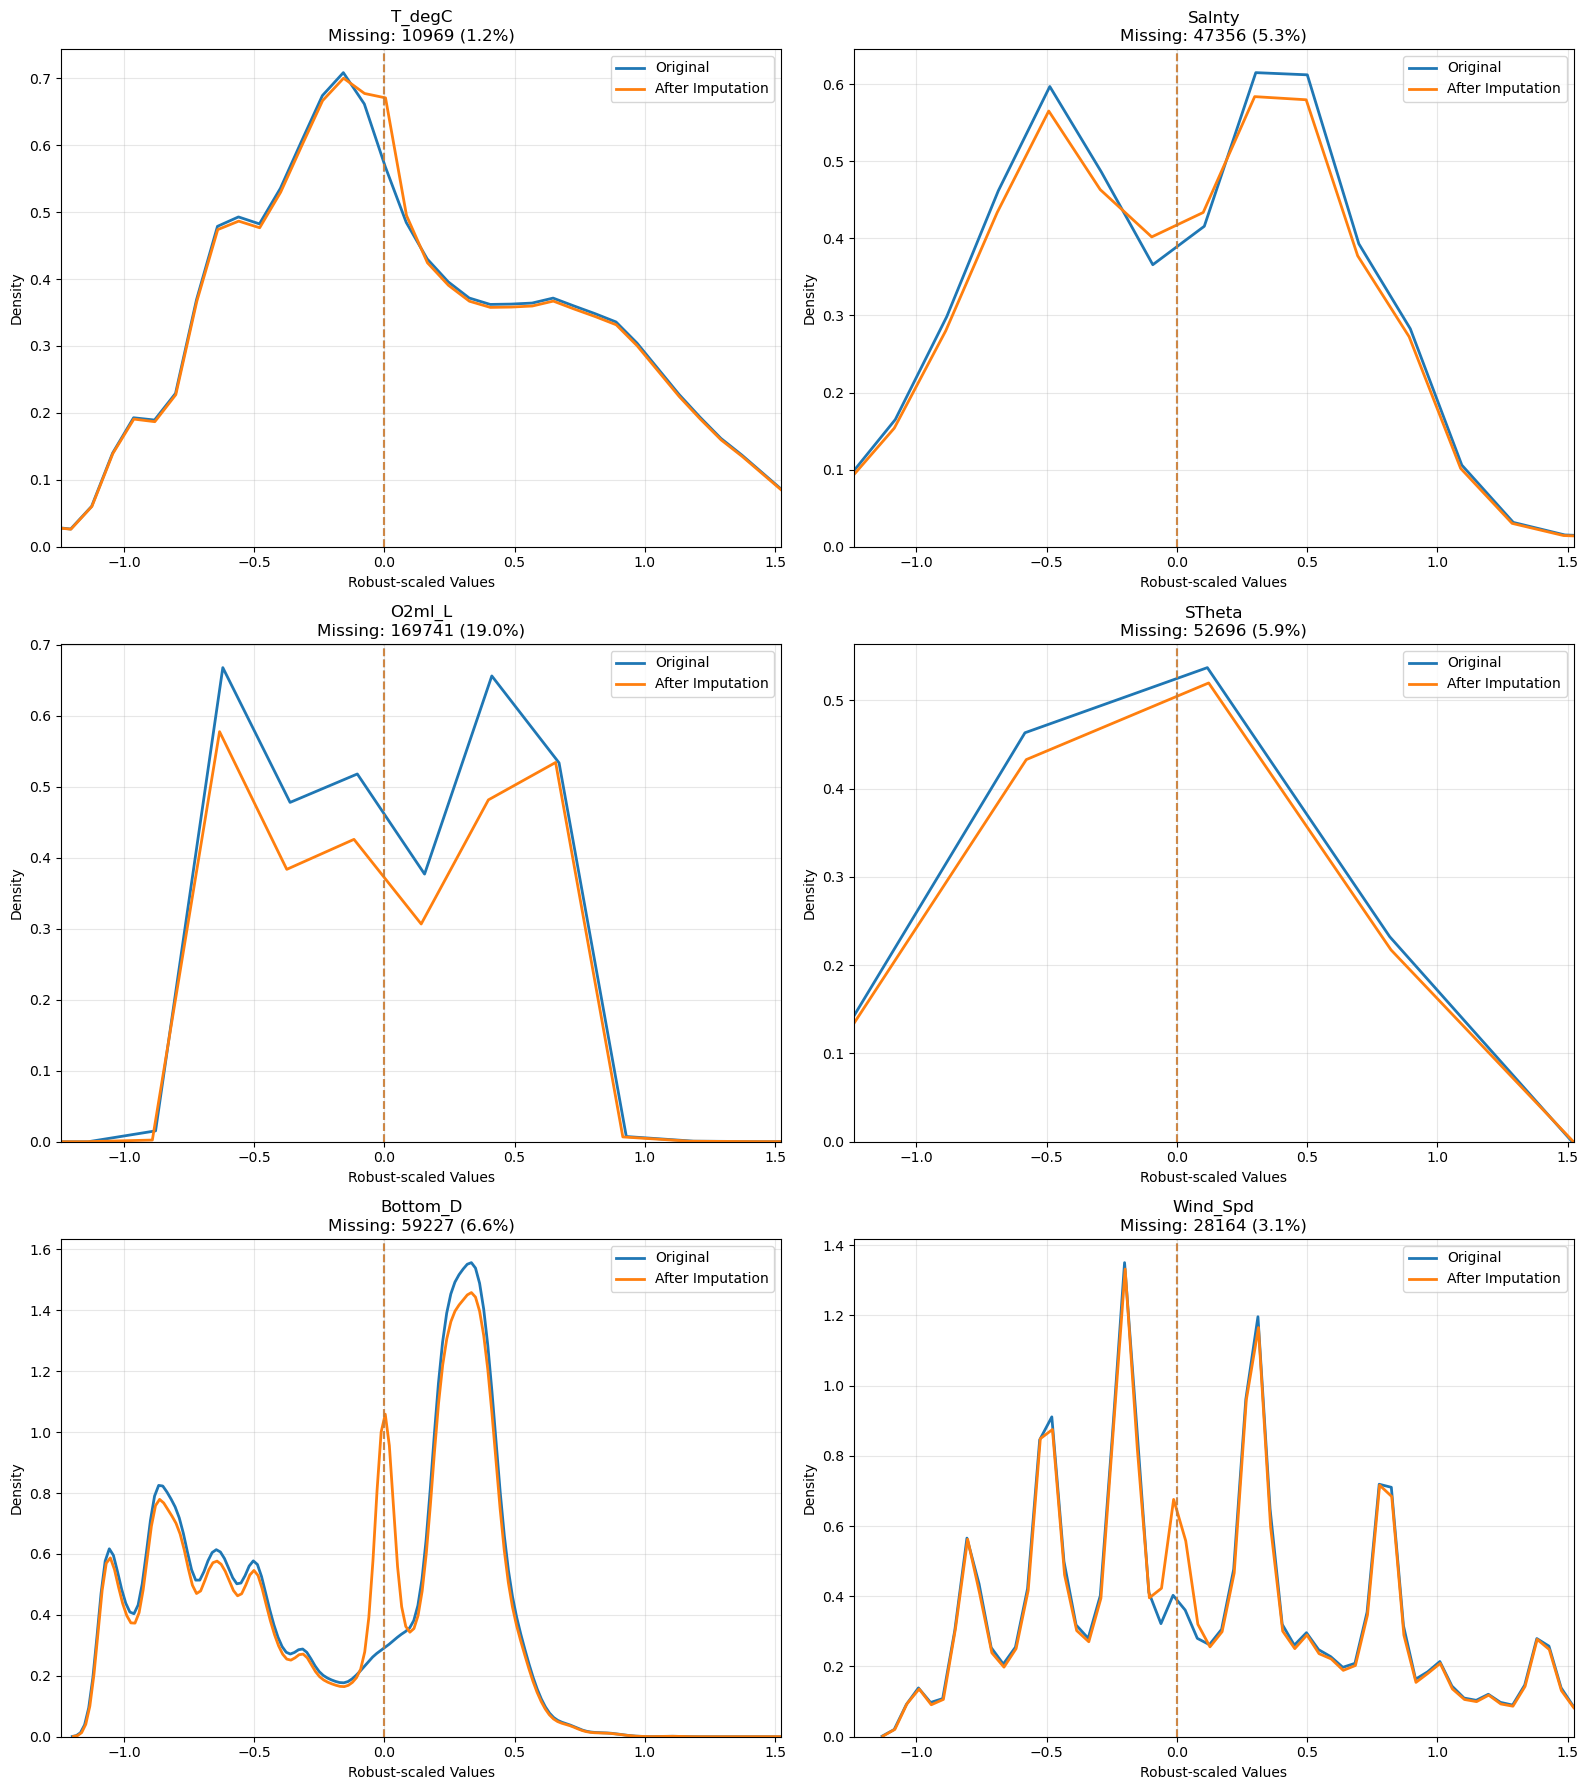

In [52]:
# it takes ~30 seconds to run
from sklearn.preprocessing import RobustScaler

# Data preparation
null_counts = df.isnull().sum()
cols_with_nulls = null_counts[null_counts > 0].index.tolist()

# Perform median imputation
df_after = df.fillna(df.median())

# Pre-calculate scaling parameters
scaler = RobustScaler()
scaled_data = {}

for col in cols_with_nulls:
    original = df[col].dropna().values.reshape(-1, 1)
    imputed = df_after[col].values.reshape(-1, 1)
    
    # Fit on original non-null data only
    scaler.fit(original)
    scaled_data[col] = {
        'original': scaler.transform(original),
        'imputed': scaler.transform(imputed)
    }

# Determine global x-axis limits
all_scaled = np.concatenate([np.concatenate([v['original'], v['imputed']]) 
                           for v in scaled_data.values()])
x_min, x_max = np.percentile(all_scaled, [1, 99])

# Prepare figure
n_cols = len(cols_with_nulls)
n_rows = int(np.ceil(n_cols / 2))
fig, axes = plt.subplots(n_rows, 2, figsize=(16, n_rows*6))
axes = axes.flatten()

# Create comparison plots
for i, col in enumerate(cols_with_nulls):
    ax = axes[i]
    data = scaled_data[col]
    
    # Plot distributions
    sns.kdeplot(data['original'].ravel(), color='#1f77b4', 
                label='Original', ax=ax, linewidth=2)
    sns.kdeplot(data['imputed'].ravel(), color='#ff7f0e', 
                label='After Imputation', ax=ax, linewidth=2)
    
    # Add medians
    ax.axvline(np.median(data['original']), color='#1f77b4', 
               ls='--', alpha=0.7)
    ax.axvline(np.median(data['imputed']), color='#ff7f0e', 
               ls='--', alpha=0.7)
    
    # Set consistent x-axis range
    ax.set_xlim(x_min, x_max)
    
    # Formatting
    ax.set_title(f"{col}\nMissing: {null_counts[col]} ({null_counts[col]/len(df):.1%})")
    ax.set_xlabel("Robust-scaled Values")
    ax.grid(alpha=0.3)
    ax.legend()

# Clean up empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

We see that we're introducing biases with this method, to be safer let's drop the missing data.

In [53]:
df= df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 635938 entries, 3771 to 895370
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Depthm    635938 non-null  int64  
 1   T_degC    635938 non-null  float64
 2   Salnty    635938 non-null  float64
 3   O2ml_L    635938 non-null  float64
 4   STheta    635938 non-null  float64
 5   RecInd    635938 non-null  int64  
 6   Quarter   635938 non-null  int64  
 7   Lat_Dec   635938 non-null  float64
 8   Lon_Dec   635938 non-null  float64
 9   Bottom_D  635938 non-null  float64
 10  Wind_Spd  635938 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 58.2 MB


In [54]:
df["RecInd"].value_counts() # RecInd = record indicator, quality code for the data
# “3” Observed Data
# “4” Educated office guess (ghost)
# “5” Data from STD or CTD sensor
# “6” Duplicate Depth
# “7” Interpolated to a standard depth"

RecInd
3    375712
7    258121
5      2002
6       101
4         2
Name: count, dtype: int64

In [55]:
# Remove low-quality codes 4 and 6
df = df[~df["RecInd"].isin([4, 6])]

df.drop(columns=["RecInd"], inplace=True) # Drop RecInd column


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 635835 entries, 3771 to 895370
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Depthm    635835 non-null  int64  
 1   T_degC    635835 non-null  float64
 2   Salnty    635835 non-null  float64
 3   O2ml_L    635835 non-null  float64
 4   STheta    635835 non-null  float64
 5   Quarter   635835 non-null  int64  
 6   Lat_Dec   635835 non-null  float64
 7   Lon_Dec   635835 non-null  float64
 8   Bottom_D  635835 non-null  float64
 9   Wind_Spd  635835 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 53.4 MB


## PCA 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df.columns.tolist()  # list of feature names

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.values)
# Initialize PCA; here we do not limit the number of components so that we get all of them.
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# The percentage of variance explained by each component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
for i, var in enumerate(explained_variance, start=1):
    print(f"PC{i}: {var:.2%}")

# Create a DataFrame for the PCA components (loadings)
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i}' for i in range(1, len(features)+1)],
                        index=features)
print("\nPCA Component Loadings:")
print(loadings)

Explained Variance Ratio:
PC1: 37.37%
PC2: 19.21%
PC3: 12.38%
PC4: 10.46%
PC5: 8.91%
PC6: 4.48%
PC7: 4.28%
PC8: 1.61%
PC9: 1.20%
PC10: 0.10%

PCA Component Loadings:
               PC1       PC2       PC3       PC4       PC5       PC6  \
Depthm    0.403901 -0.087149  0.143266  0.099155 -0.106297 -0.282473   
T_degC   -0.470005  0.189896  0.112054  0.081952  0.002962  0.287131   
Salnty    0.372242  0.275312  0.097878  0.080252  0.073115  0.812124   
O2ml_L   -0.477437 -0.100645  0.034174 -0.024229 -0.073339 -0.033957   
STheta    0.498294 -0.055579 -0.082702 -0.067950  0.019304 -0.141083   
Quarter  -0.022823 -0.053354 -0.078767  0.848304  0.503761 -0.103450   
Lat_Dec  -0.007818 -0.537978 -0.535591 -0.092186  0.067442  0.188018   
Lon_Dec   0.000050  0.665730 -0.055091 -0.096532  0.140588 -0.333186   
Bottom_D  0.020092 -0.311291  0.723821  0.188504 -0.262704 -0.006892   
Wind_Spd -0.012882 -0.186988  0.359606 -0.445911  0.794036 -0.006997   

               PC7       PC8       PC9   

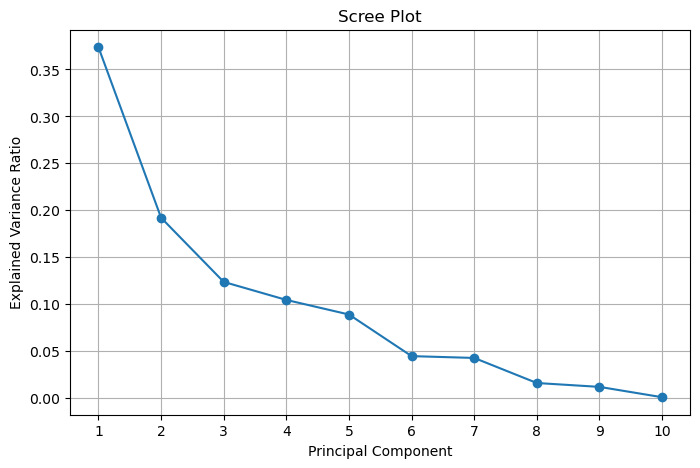

In [64]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(True)
plt.show()

## Plots

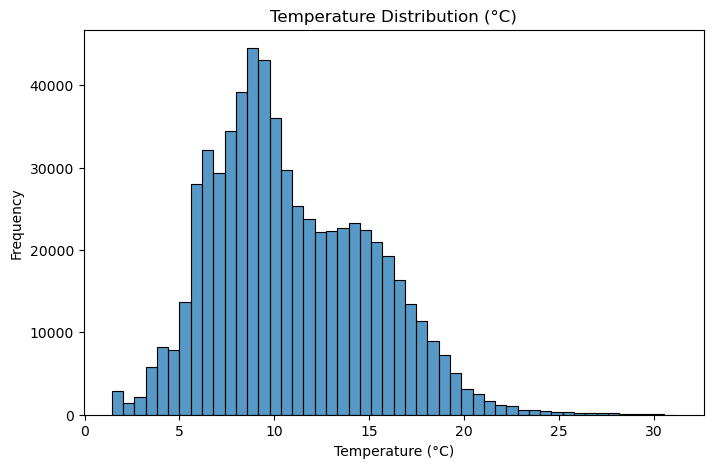

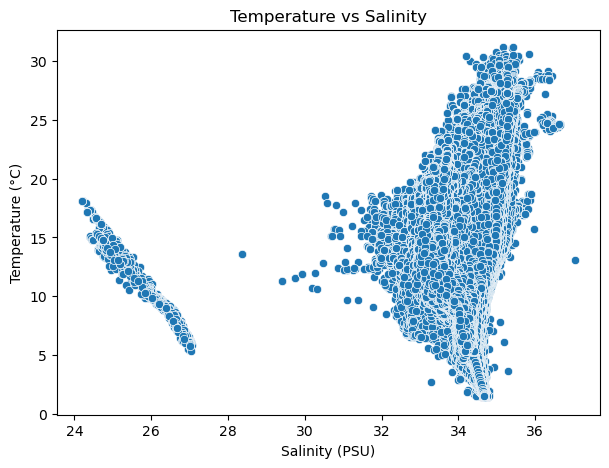

In [58]:
# Temperature distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['T_degC'].dropna(), bins=50)
plt.title("Temperature Distribution (°C)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

# Scatterplot of Temperature vs Salinity
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, y='T_degC', x='Salnty')
plt.title("Temperature vs Salinity")
plt.ylabel("Temperature (°C)")
plt.xlabel("Salinity (PSU)")
plt.show()

Notice that the outliers we had at the beginning are now gone

## T-S Diagram

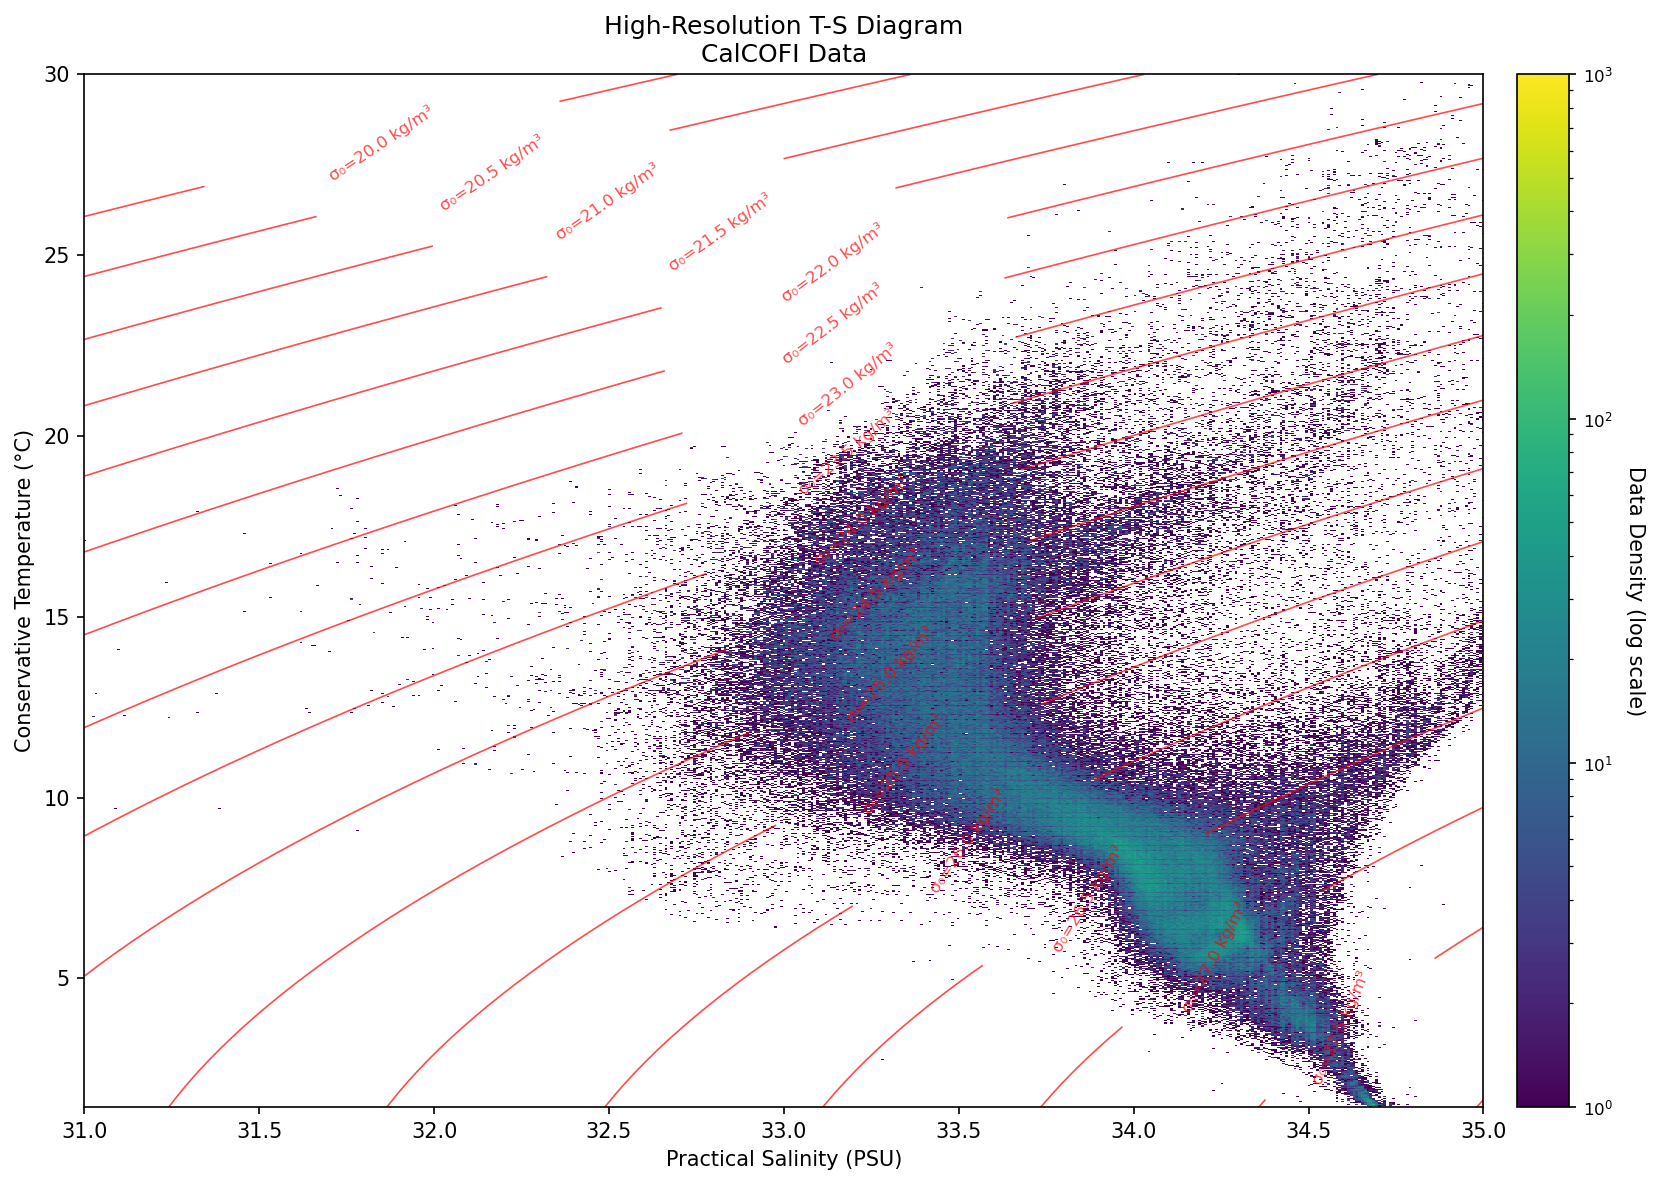

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import gsw  # Modern replacement for seawater
import seaborn as sns

# Filter and prepare data
ts_data = df[['T_degC', 'Salnty', 'Depthm','Lon_Dec','Lat_Dec']].dropna()

# Convert to Absolute Salinity (required by TEOS-10)
SA = gsw.SA_from_SP(ts_data['Salnty'], ts_data['Depthm'], ts_data['Lon_Dec'], ts_data['Lat_Dec'])
CT = gsw.CT_from_t(SA, ts_data['T_degC'], ts_data['Depthm'])

# Create figure with optimized settings
plt.figure(figsize=(12, 8), dpi=150)
ax = plt.gca()

# 2D Histogram with logarithmic color scale
h = ax.hist2d(
    x=ts_data['Salnty'],
    y=ts_data['T_degC'],
    bins=(1600, 1600),
    cmap='viridis',
    norm=LogNorm(vmin=1, vmax=1000),
    cmin=1  # Ignore empty bins
)

# Calculate potential density contours
sal_vals = np.linspace(31, 35, 100)
temp_vals = np.linspace(0, 30, 100)
S, T = np.meshgrid(sal_vals, temp_vals)
SA_contour = gsw.SA_from_SP(S, 0, -124, 34)  # Example position for CalCOFI
CT_contour = gsw.CT_from_t(SA_contour, T, 0)
sigma_theta = gsw.sigma0(SA_contour, CT_contour)

# Plot density contours
cs = ax.contour(
    S, T, sigma_theta,
    levels=np.arange(20, 30, 0.5),
    colors='red',
    linewidths=0.8,
    alpha=0.7
)
ax.clabel(cs, fmt='σ₀=%.1f kg/m³', fontsize=8)

# Formatting
ax.set_xlim(31, 35)
ax.set_ylim(ts_data['T_degC'].min(), 30)
# ax.invert_yaxis()

ax.set_xlabel('Practical Salinity (PSU)', fontsize=10)
ax.set_ylabel('Conservative Temperature (°C)', fontsize=10)
ax.set_title('High-Resolution T-S Diagram\nCalCOFI Data', fontsize=12)

# Add colorbar
cbar = plt.colorbar(h[3], ax=ax, pad=0.02)
cbar.set_label('Data Density (log scale)', rotation=270, labelpad=15)
cbar.ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()

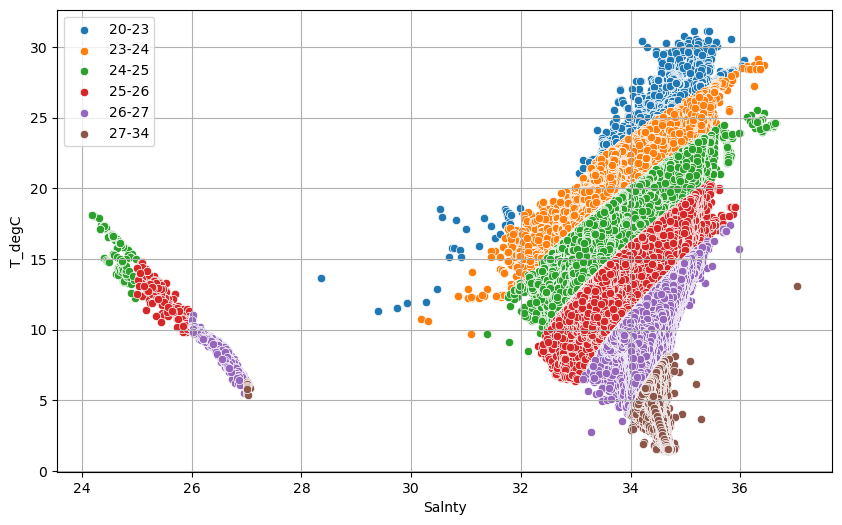

In [60]:
theta_step=[20,23,24,25,26,27,34]
plt.rcParams['figure.figsize']=10,6

for theta1, theta2 in zip(theta_step, theta_step[1:]):
    bottle_stheta=df[(df['STheta']>=theta1) & (df['STheta']<theta2)]
    sns.scatterplot(data=bottle_stheta,y='T_degC',x='Salnty',label=str(theta1)+'-'+str(theta2))
   
plt.grid()

## Spatial Distribution

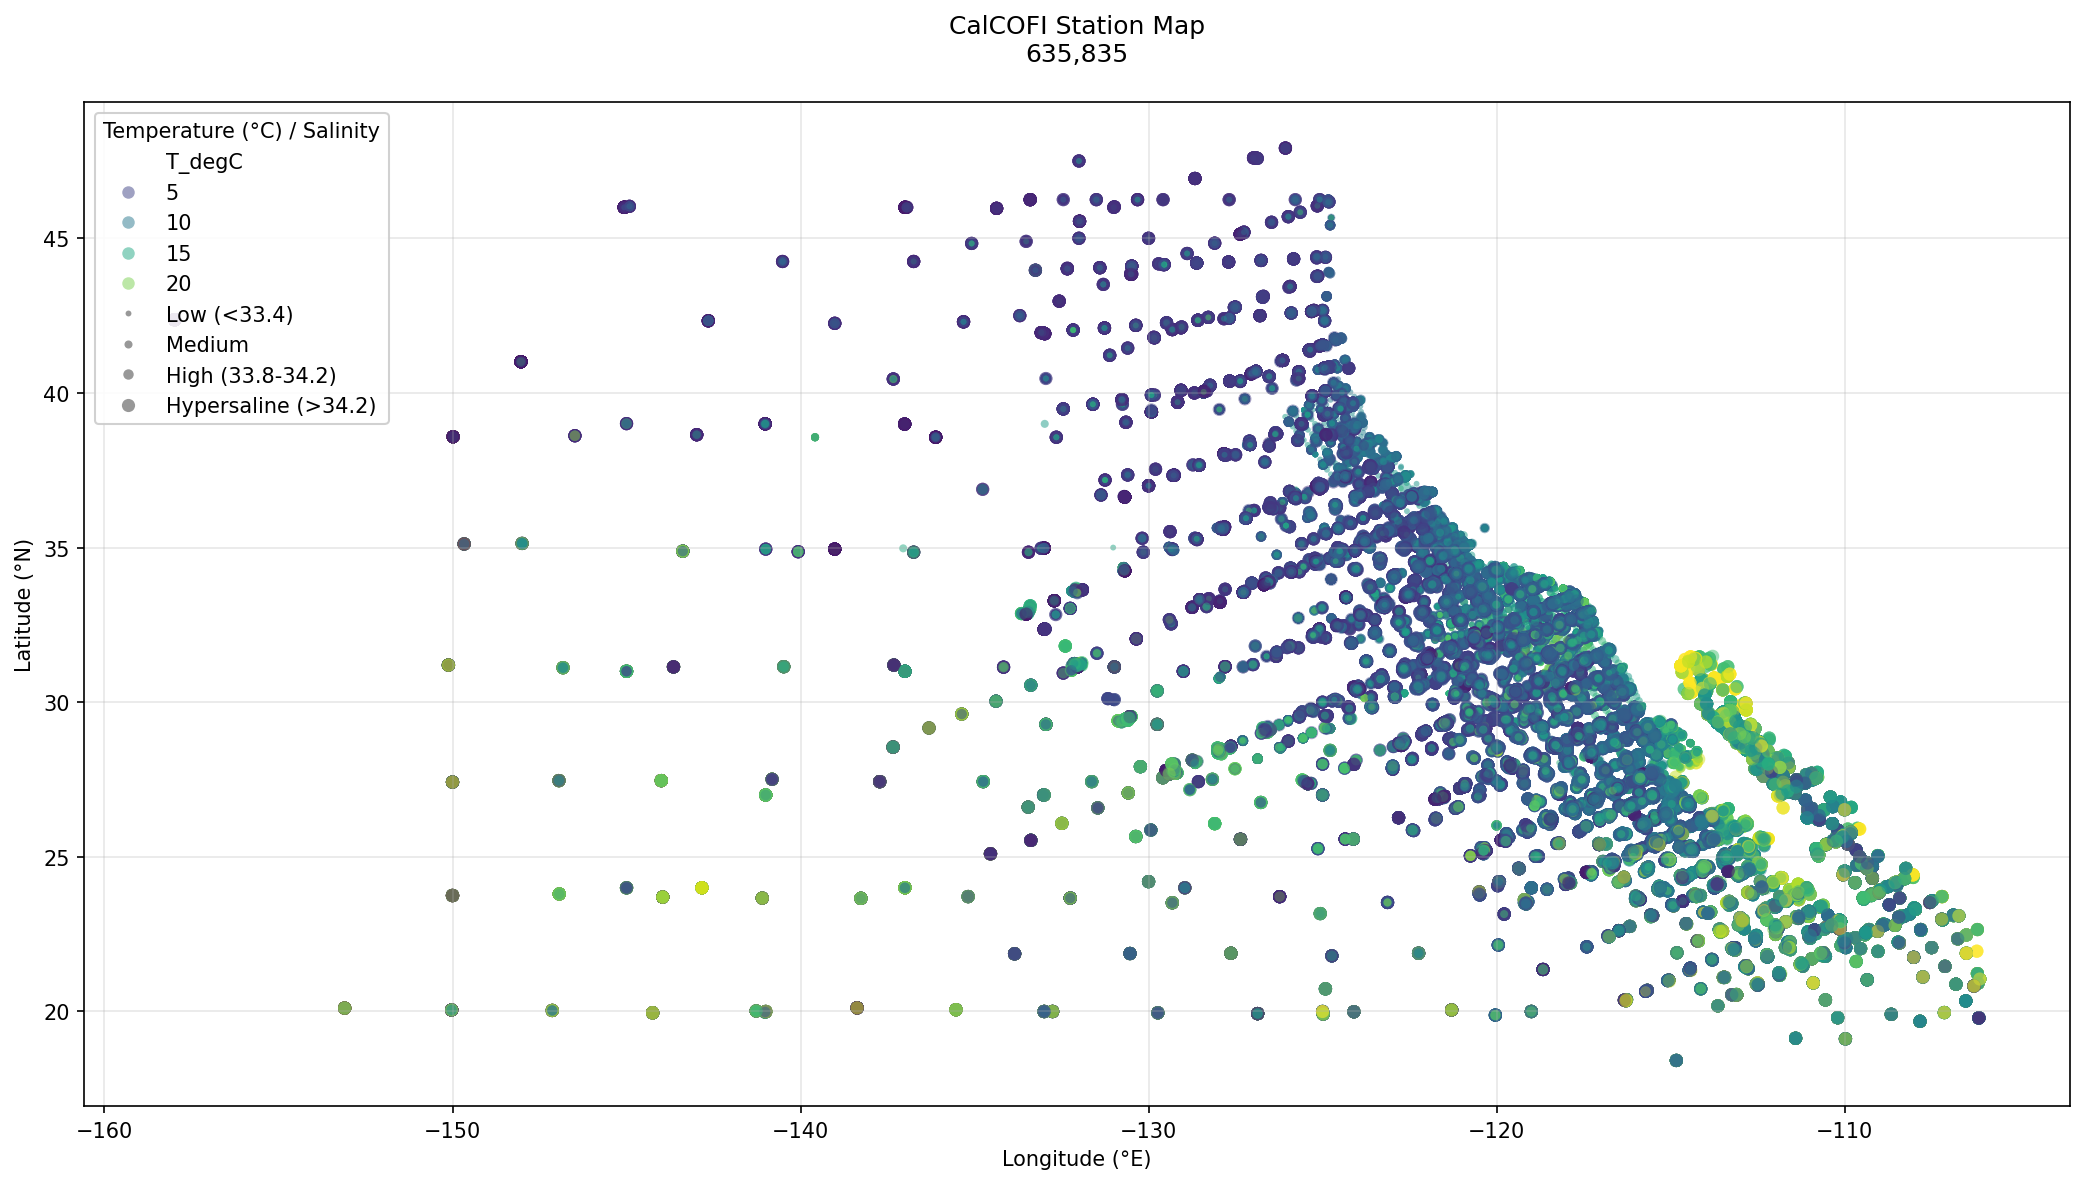

In [61]:
# it takes ~10 seconds to run
# Optimized parameters
SAMPLE_SIZE = df["Lon_Dec"].size
BINNED_SALINITY = True
ALPHA = 0.5  # Transparency for overlapping points
DPI = 150

# Subsample data for visualization
plot_data = df.sample(SAMPLE_SIZE, random_state=42).copy()

# Convert coordinates to float32 to reduce memory
plot_data['Lon_Dec'] = plot_data['Lon_Dec'].astype(np.float32)
plot_data['Lat_Dec'] = plot_data['Lat_Dec'].astype(np.float32)

# Optimize salinity sizing
if BINNED_SALINITY:
    plot_data['Salinity_Level'] = pd.cut(plot_data['Salnty'],
                                         bins=[0, 33.4, 33.8, 34.2, 45],
                                         labels=['Low (<33.4)', 'Medium', 'High (33.8-34.2)', 'Hypersaline (>34.2)'])
    size_map = {'Low (<33.4)': 8, 'Medium': 15, 'High (33.8-34.2)': 25, 'Hypersaline (>34.2)': 40}
else:
    size_map = None

# Create figure with optimized settings
plt.figure(figsize=(14, 8), dpi=DPI)
ax = plt.gca()

# Vectorized scatter plot
sc = sns.scatterplot(
    x='Lon_Dec',
    y='Lat_Dec',
    size='Salinity_Level' if BINNED_SALINITY else 'Salnty',
    hue='T_degC',
    data=plot_data,
    palette='viridis',
    hue_norm=(0, 25),  # Focus on typical ocean temp range
    alpha=ALPHA,
    edgecolor='none',
    sizes=size_map,
    rasterized=True  # Critical for large datasets
)

# Formatting
ax.set_title(f"CalCOFI Station Map\n{SAMPLE_SIZE:,}", pad=20)
ax.set_xlabel("Longitude (°E)")
ax.set_ylabel("Latitude (°N)")
ax.grid(alpha=0.3)

# Optimize legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[:5] + handles[-4:],  # Keep temp colorbar + salinity sizes
    labels[:5] + labels[-4:],
    title='Temperature (°C) / Salinity',
    frameon=True,
    framealpha=0.9,
    loc='upper left'
)

plt.tight_layout()
plt.show()